# finding_clusters

Quick notebook to find clusters with the NOX data.

Very early notebook, not updated.

In [12]:
# import libs
import sys
sys.path.insert(0, '../PythonFiles/')

import matplotlib.pyplot as plt
import pandas as pd



ModuleNotFoundError: No module named 'plotting'

In [29]:
import numpy as np
def plot_classes(X,y, vars = None, **kwargs):

    """
    Given X and y, where X represents the X values and y the classes, plots outcomes
    with different colors.

    I want to have the option of choosing which variables to plot against each other
    NOTE: 
    -----
    - lacks the use of **kwargs *args properly
    - does not have functionality for x, y and title labels
    - does not have legend
    - only 2 dimensional

    """
    if vars:
        pass # here add code for custom variables
    else:
        ncols = int(X.shape[1] ** (1/2))
        nrows = X.shape[1] // ncols

    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (nrows * 8, ncols * 8))
    axes = np.array(axes)
    feature_1 = 0
    feature_2 = feature_1 + 1
    for j, column in enumerate(axes):
        for i, row in enumerate(column[0]):
            for y_unique in np.unique(y):
                axes[j,i].plot(
                    X[y == y_unique, feature_1],
                    X[y == y_unique, feature_2],
                    '.'
                )
                axes[j,i].set_xlabel('Feature {}'.format(feature_1))
                axes[j,i].set_ylabel('Feature {}'.format(feature_2))

            feature_2 += 1
            if feature_2 >= X.shape[1]:
                feature_1 += 1
                feature_2 = feature_1 + 1
    plt.legend([*np.unique(y)])
    return fig, axes

In [4]:
path = '../data/Boston_Housing_Market_Challenge/boston_corrected.csv'
df = pd.read_csv(path)
df.head()

,TOWN,TOWNNO,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,2,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,2,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


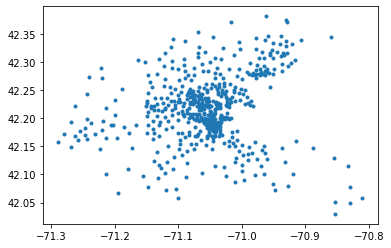

In [8]:
plt.plot(df.LON, df.LAT,'.')

In [22]:
NOX = df['NOX']
NOX.name = 'is_polluted'
NOX[NOX > NOX.median()] = True
NOX[NOX <= NOX.median()] = False
NOX = NOX.astype('int')

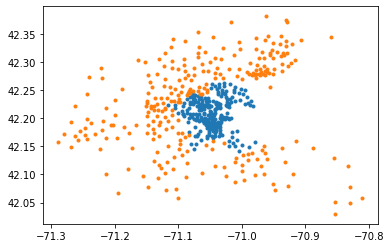

In [36]:
plt.plot(df.LON[NOX == 1], df.LAT[NOX == 1],'.')
plt.plot(df.LON[NOX == 0], df.LAT[NOX == 0],'.')

In [ ]:
# we cluster the data, so that we're creating a new y_i, which is pollutions levels
